# `Cannabis (drug)`

#### `INFORMATION`:

### Everything we need to know about marijuana (cannabis)

>`Cannabis, also known as marijuana among other names, is a psychoactive drug from the Cannabis plant used for medical or recreational purposes. The main psychoactive part of cannabis is tetrahydrocannabinol (THC), one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract`

>[For more information](https://www.medicalnewstoday.com/articles/246392.php)

[VIDEO](https://youtu.be/GhTYI3DeNgA)

![](https://cdn.shopify.com/s/files/1/0975/1130/files/GLPlantInfo_58b4c4d0-eda7-4fc3-97ed-1319ca431e62.jpg?v=1525710776)

In [100]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import warnings
warnings.simplefilter("ignore")
import numpy as np

In [79]:
df = pd.read_csv("cannabis.csv");df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


`Understainding attributes`

>| Attribute Name  | Info                                         |
| --------------  | -------------------------------------------- |
| Strain Name     | Given Name of strain                         |
| Type            | type of Strain(namly indica, sativa, hybrid) |
| rating          | User Rating                                  |
| Effects         | Different effects optained                   |
| Description     | other backround info                         |


### UNDERSTAING DATA 
like finding null values

In [8]:
df.shape#showing (row , columns)

(2351, 6)

In [9]:
df.info()#geting basic information like datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

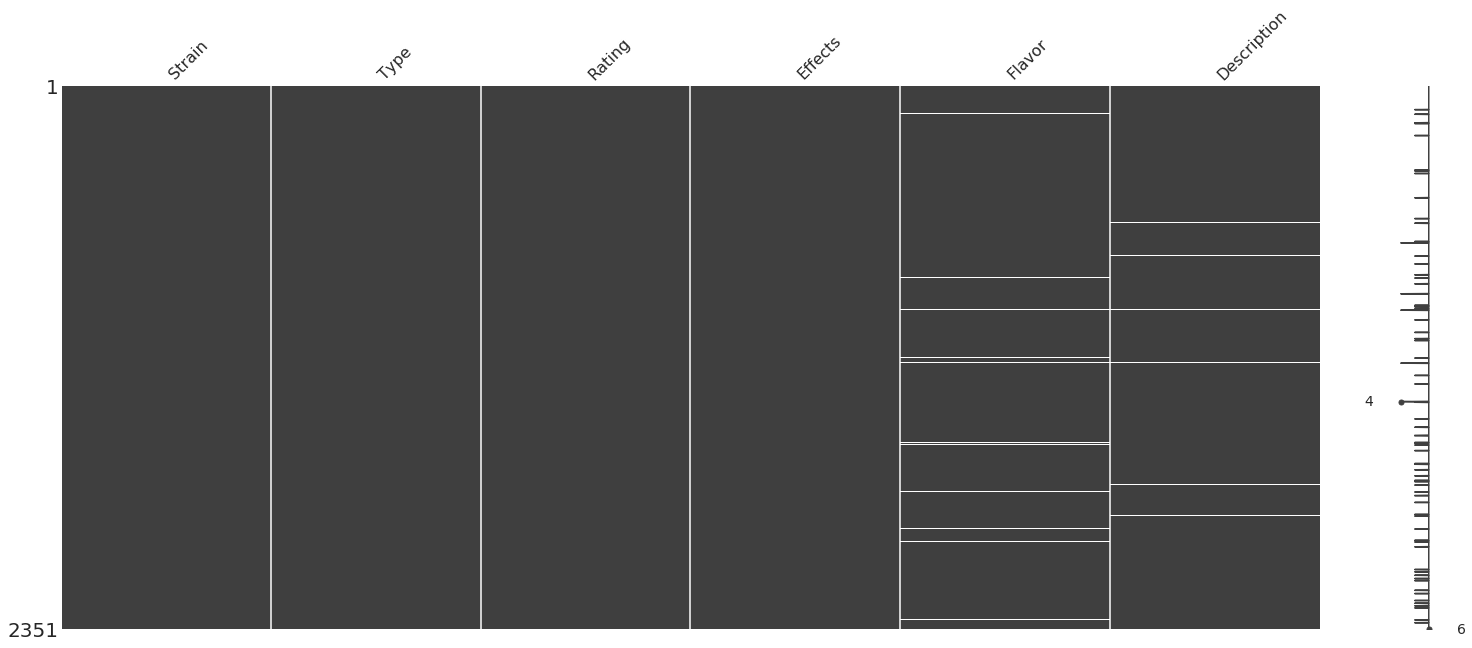

In [44]:
#we can clearly see there are some missing values in Flavor and Description
missingno.matrix(df);
df.isnull().sum()#see null values

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64


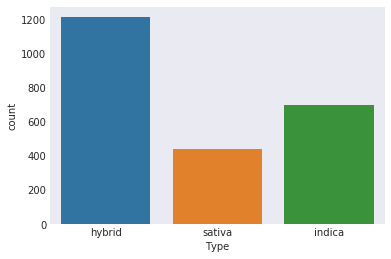

In [45]:
print(df.Type.value_counts())#counting the occurence of values
sns.categorical.countplot(df.Type);#displaying it through graph

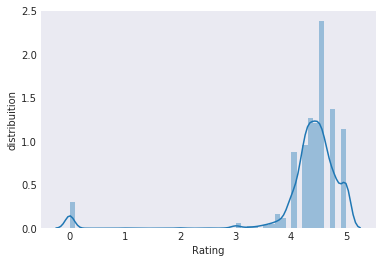

In [46]:
plt.ylabel("distribuition")
sns.distplot(df.Rating);
#by this we can see that all the types have rating more than 3.5

In [53]:
#finding max rating to each type
df.groupby(["Type"])["Rating"].max()

Type
hybrid    5.0
indica    5.0
sativa    5.0
Name: Rating, dtype: float64

In [54]:
#finding min rating to each type
df.groupby(["Type"])["Rating"].min()

Type
hybrid    0.0
indica    0.0
sativa    0.0
Name: Rating, dtype: float64

In [58]:
#mean rating
df.groupby(["Type"])["Rating"].mean()

Type
hybrid    4.291667
indica    4.347783
sativa    4.303864
Name: Rating, dtype: float64

In [80]:
#Now we will extract the values in Effects and Flavor and pass to a new column
effect = pd.DataFrame(df.Effects.str.split(',',4).tolist(),
             columns = ['Eone','Etwo','Ethree','Efour','Efive'])

flavors = pd.DataFrame(df.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Fone','Ftwo','Fthree'])

In [81]:
df = pd.concat([df, effect], axis=1)
df = pd.concat([df, flavors], axis=1)#concating the two dataframes
#for more information plz visit
#link => http://pandas.pydata.org/pandas-docs/stable/merging.html

In [82]:
df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description', 'Eone',
       'Etwo', 'Ethree', 'Efour', 'Efive', 'Fone', 'Ftwo', 'Fthree'],
      dtype='object')

Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Eone, dtype: int64


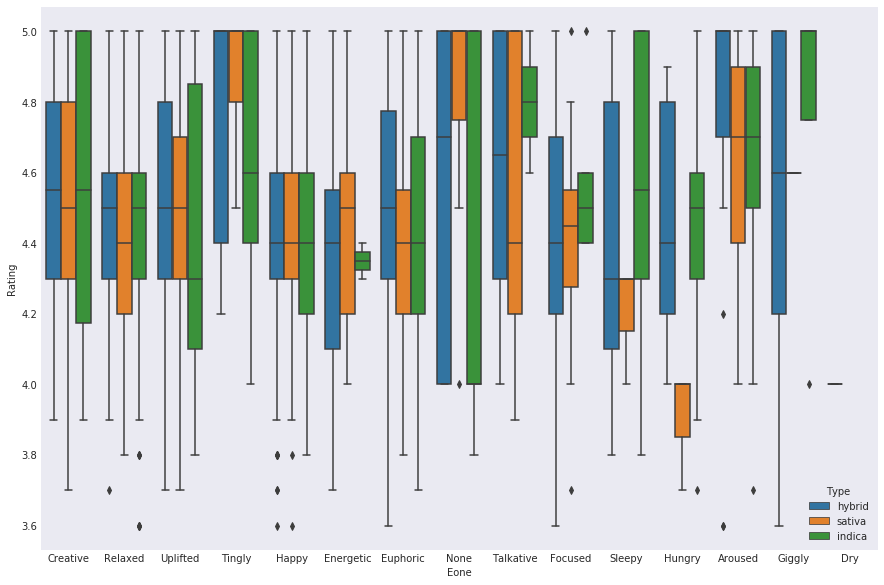

In [92]:
#finding top 5 effects
print(df.Eone.value_counts().head())
plt.figure(figsize=(15,10))
sns.boxplot(x = "Eone",y = "Rating",hue="Type",data=df[df.Rating > 3.5]);

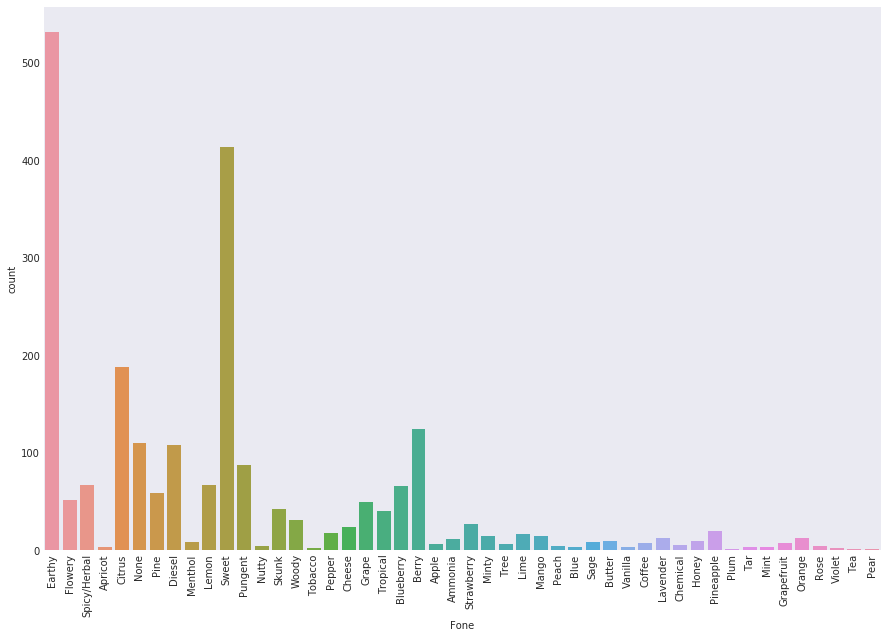

In [98]:
#finding top 5 Flavor
df.Eone.value_counts().head()
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x = "Fone",data=df);